In [2]:
#import tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#removing unwanted cols
X = dataset.iloc[:, 3:13] #independent df
y = dataset.iloc[:, 13] #dependent df

In [6]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [8]:
print(geography)
print(gender)

      Germany  Spain
0           0      0
1           0      1
2           0      0
3           0      0
4           0      1
...       ...    ...
9995        0      0
9996        0      0
9997        0      0
9998        1      0
9999        0      0

[10000 rows x 2 columns]
      Male
0        0
1        0
2        0
3        0
4        0
...    ...
9995     1
9996     1
9997     0
9998     1
9999     0

[10000 rows x 1 columns]


In [9]:
#Concatenate the DataFrames
X = pd.concat([X,geography,gender],axis = 1)

# Drop Unnecessary columns
X = X.drop(['Geography','Gender'],axis=1)


In [10]:
#Splitting the dataset into train and test :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [11]:
#Feature Scaling :
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
from tensorflow.keras.layers import Dense

In [17]:
# make the ANN Model :
model = tf.keras.models.Sequential()
#Input Layer :
model.add(Dense(units=11,activation='relu',name='InputLayer'))
#Hidden Layer1 :
model.add(Dense(units=12,activation='relu',name='HiddenLayer1'))
#HiddenLayer 2:
model.add(Dense(units=6,activation='relu',name='HiddenLayer2'))
#Output Layer :
model.add(Dense(units=1,activation='sigmoid',name='OutputLayer'))


In [18]:
# Model Compilation :
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
#Erly Stopping
import tensorflow as tf
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [20]:
#Training the Model :
model.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50,callbacks=early_stop)

Epoch 1/50
536/536 [==============================] - 7s 4ms/step - loss: 0.4965 - accuracy: 0.7925 - val_loss: 0.4529 - val_accuracy: 0.7955
Epoch 2/50
536/536 [==============================] - 2s 4ms/step - loss: 0.4291 - accuracy: 0.8003 - val_loss: 0.4375 - val_accuracy: 0.8061
Epoch 3/50
536/536 [==============================] - 2s 4ms/step - loss: 0.4148 - accuracy: 0.8201 - val_loss: 0.4268 - val_accuracy: 0.8141
Epoch 4/50
536/536 [==============================] - 3s 5ms/step - loss: 0.4029 - accuracy: 0.8317 - val_loss: 0.4192 - val_accuracy: 0.8198
Epoch 5/50
536/536 [==============================] - 2s 4ms/step - loss: 0.3919 - accuracy: 0.8341 - val_loss: 0.4090 - val_accuracy: 0.8251
Epoch 6/50
536/536 [==============================] - 2s 4ms/step - loss: 0.3818 - accuracy: 0.8429 - val_loss: 0.4008 - val_accuracy: 0.8292
Epoch 7/50
536/536 [==============================] - 2s 4ms/step - loss: 0.3715 - accuracy: 0.8470 - val_loss: 0.3937 - val_accuracy: 0.8342
Epoch 

In [21]:
#Model Summary :
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Dense)          (None, 11)                132       
                                                                 
 HiddenLayer1 (Dense)        (None, 12)                144       
                                                                 
 HiddenLayer2 (Dense)        (None, 6)                 78        
                                                                 
 OutputLayer (Dense)         (None, 1)                 7         
                                                                 
Total params: 361 (1.41 KB)
Trainable params: 361 (1.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# list all data in history
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

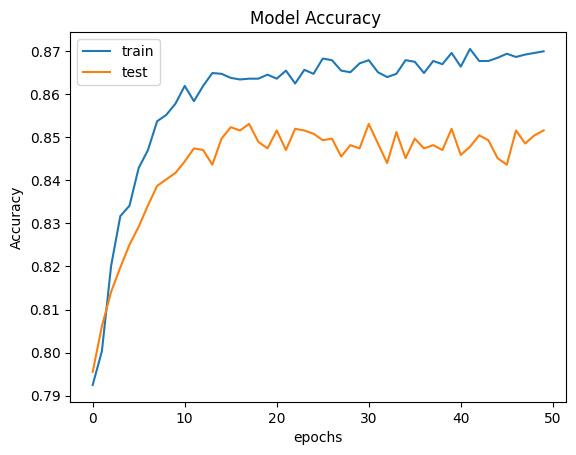

In [24]:
# summarize history for accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title("Model Accuracy ")
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc ='upper left')
plt.show()

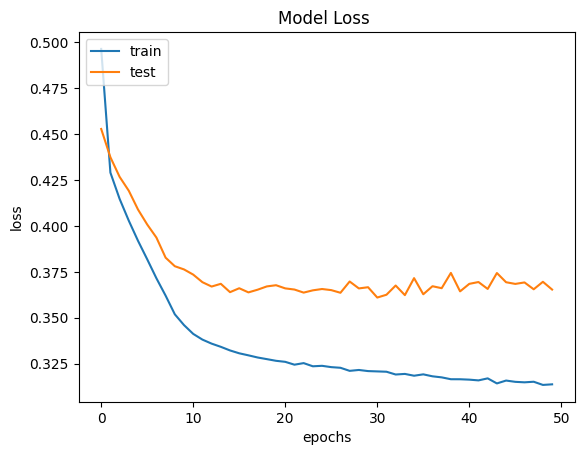

In [25]:
#summarize history for Loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Model Loss ")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc ='upper left')
plt.show()

In [26]:
# Making the predictions and evaluating the model
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = y_pred >= 0.5

63/63 [==============================] - 0s 3ms/step


In [27]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1493,  102],
       [ 198,  207]])

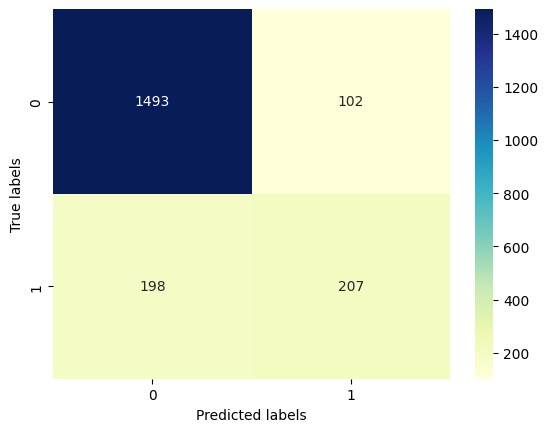

In [29]:
#Making Heat Map
import seaborn as sns

# Create the heatmap with scores
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")

# Set labels and show map
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [32]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

0.85


In [33]:
#Save Trained Model :
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [34]:
# Save Uploaded Data:
with open('Churn_Modelling.csv', 'wb') as f:
    f.write(Churn_Modelling.getvalue())

NameError: name 'Churn_Modelling' is not defined

In [35]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [36]:
# Save model to Google Drive
with open('/content/drive/MyDrive/DeepLearning/Churn Model using ANN/model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save uploaded data to Google Drive
with open('/content/drive/MyDrive/DeepLearning/Churn Model using ANN/Churn_Modelling.csv', 'wb') as f:
    f.write(Churn_Modelling.getvalue())


NameError: name 'Churn_Modelling' is not defined